In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
data = pd.read_csv("desktop/4_1/4_1caseolap.csv",index_col=0)
 
#prepare the data
X = data.iloc[:,0:8]   

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
arr = pca.components_
print(arr)

[[ 0.45501129  0.46799391  0.36741625  0.27423396  0.29907341  0.25932219
   0.19563516  0.41083018]
 [-0.44631626 -0.3408683   0.4475566   0.03203303  0.43666166  0.51070098
  -0.00208248 -0.17828162]]


In [5]:
print(pca.explained_variance_)

[0.00185189 0.00021646]


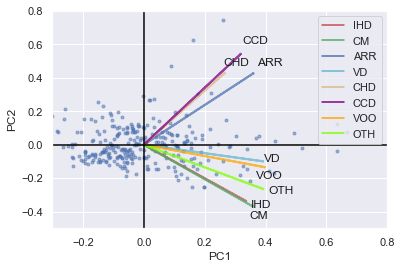

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

data = pd.read_csv("desktop/4_1/4_1caseolap.csv",index_col=0)
data = data.query("IHD>0.05|CM>0.05|ARR>0.05|VD>0.05|CHD>0.05|CCD>0.05|VOO>0.05|OTH>0.05")

#prepare the data
X = data.iloc[:,0:8]

#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X)
x_new = pca.transform(X)   

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
  
    plt.scatter(xs*scalex ,ys*scaley, marker = '.', alpha = 0.5)
    plt.grid()
    
    plt.xlim(-0.3,0.8)
    plt.ylim(-0.5,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    #IHD = lines.Line2D([], [], color='r', marker='-',
                          #markersize=15, label='IHD')
    #plt.legend(handles=[IHD])
    #plot all the arrows along with catagory names
    IHD_arrow = plt.arrow(0, 0, coeff[0,0], coeff[0,1], color = 'r', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2, label = 'IHD')
    plt.text(coeff[0,0]* 1.15, coeff[0,1] * 1.15, "IHD", color = 'k', ha = 'center', va = 'bottom')
    
    plt.arrow(0, 0, coeff[1,0], coeff[1,1], color = 'g', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[1,0]* 1.15, coeff[1,1] * 1.15, "CM", color = 'k', ha = 'right', va = 'center')
    
    plt.arrow(0, 0, coeff[2,0], coeff[2,1], color = 'b', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[2,0]* 1.15, coeff[2,1] * 1.15, "ARR", color = 'k', ha = 'center', va = 'center')
    
    plt.arrow(0, 0, coeff[3,0], coeff[3,1], color = 'c', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[3,0]* 1.15, coeff[3,1] * 1.15, "VD", color = 'k', ha = 'right', va = 'bottom')
    
    plt.arrow(0, 0, coeff[4,0], coeff[4,1], color = 'burlywood', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[4,0]* 1.15, coeff[4,1] * 1.15, "CHD", color = 'k', ha = 'center', va = 'center')
    
    plt.arrow(0, 0, coeff[5,0], coeff[5,1], color = 'purple', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[5,0]* 1.15, coeff[5,1] * 1.15, "CCD", color = 'k', ha = 'center', va = 'center')
    
    plt.arrow(0, 0, coeff[6,0], coeff[6,1], color = 'orange', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[6,0]* 1.15, coeff[6,1] * 1.15, "VOO", color = 'k', ha = 'right', va = 'top')
    
    plt.arrow(0, 0, coeff[7,0], coeff[7,1], color = 'chartreuse', alpha = 0.7,linestyle = '-',linewidth = 2, overhang=0.2)
    plt.text(coeff[7,0]* 1.15, coeff[7,1] * 1.15, "OTH", color = 'k', ha = 'center', va = 'bottom')
    

legend_elements = [Line2D([0], [0], color='r', label='IHD'),
                   Line2D([0], [0], color='g', label='CM'),
                   Line2D([0], [0], color='b', label='ARR'),
                   Line2D([0], [0], color='c', label='VD'),
                   Line2D([0], [0], color='burlywood', label='CHD'),
                   Line2D([0], [0], color='purple', label='CCD'),
                   Line2D([0], [0], color='orange', label='VOO'),
                   Line2D([0], [0], color='chartreuse', label='OTH'),
                   ]
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper right')
#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.grid()
plt.axhline(y=0, color="black", linestyle="-")
plt.axvline(x=0, color="black")
plt.show()



In [10]:
ax.figure.savefig('desktop/PCA_human.pdf')
var = pca.explained_variance_ratio_
var

array([0.51543446, 0.18984942, 0.10908366, 0.06922948, 0.0555523 ,
       0.02817723, 0.02047482, 0.01219863])

In [11]:
arr = pca.components_ 
print (arr)

[[ 0.33466751  0.35596725  0.35899232  0.3897385   0.26521078  0.31753423
   0.39561586  0.39094339]
 [-0.33576404 -0.36662951  0.42522163 -0.09899795  0.42761489  0.54021109
  -0.13394436 -0.26383269]
 [-0.08377488 -0.33015583 -0.34199479  0.45209515  0.44845461 -0.30193817
   0.44323219 -0.27183722]
 [ 0.61900848 -0.40025354  0.25186487 -0.00800524 -0.40066439  0.08386287
   0.22853323 -0.41633308]
 [ 0.55158531  0.15323819 -0.11964437 -0.44016697  0.61229464 -0.14505712
  -0.22486625 -0.13303696]
 [ 0.09503408  0.33000953  0.02176964  0.60301818 -0.02493046  0.03752667
  -0.55976222 -0.45010429]
 [ 0.25609876 -0.57119624 -0.17285027  0.27032476  0.04631196  0.07704498
  -0.44526065  0.5466789 ]
 [-0.07877834 -0.10493314  0.68209151  0.05827383  0.08656912 -0.69336759
  -0.12128137  0.10571827]]


In [12]:
index1 = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']
df = pd.DataFrame(arr, columns = ['IHD','CM', 'ARR', 'VD', 'CHD', 'CCD', 'VOO', 'OTH'],index = index1)

df

,IHD,CM,ARR,VD,CHD,CCD,VOO,OTH
Component 1,0.334668,0.355967,0.358992,0.389738,0.265211,0.317534,0.395616,0.390943
Component 2,-0.335764,-0.366630,0.425222,-0.098998,0.427615,0.540211,-0.133944,-0.263833
Component 3,-0.083775,-0.330156,-0.341995,0.452095,0.448455,-0.301938,0.443232,-0.271837
Component 4,0.619008,-0.400254,0.251865,-0.008005,-0.400664,0.083863,0.228533,-0.416333
Component 5,0.551585,0.153238,-0.119644,-0.440167,0.612295,-0.145057,-0.224866,-0.133037
Component 6,0.095034,0.330010,0.021770,0.603018,-0.024930,0.037527,-0.559762,-0.450104
Component 7,0.256099,-0.571196,-0.172850,0.270325,0.046312,0.077045,-0.445261,0.546679
Component 8,-0.078778,-0.104933,0.682092,0.058274,0.086569,-0.693368,-0.121281,0.105718


Text(0, 0.5, 'Featured Weight')

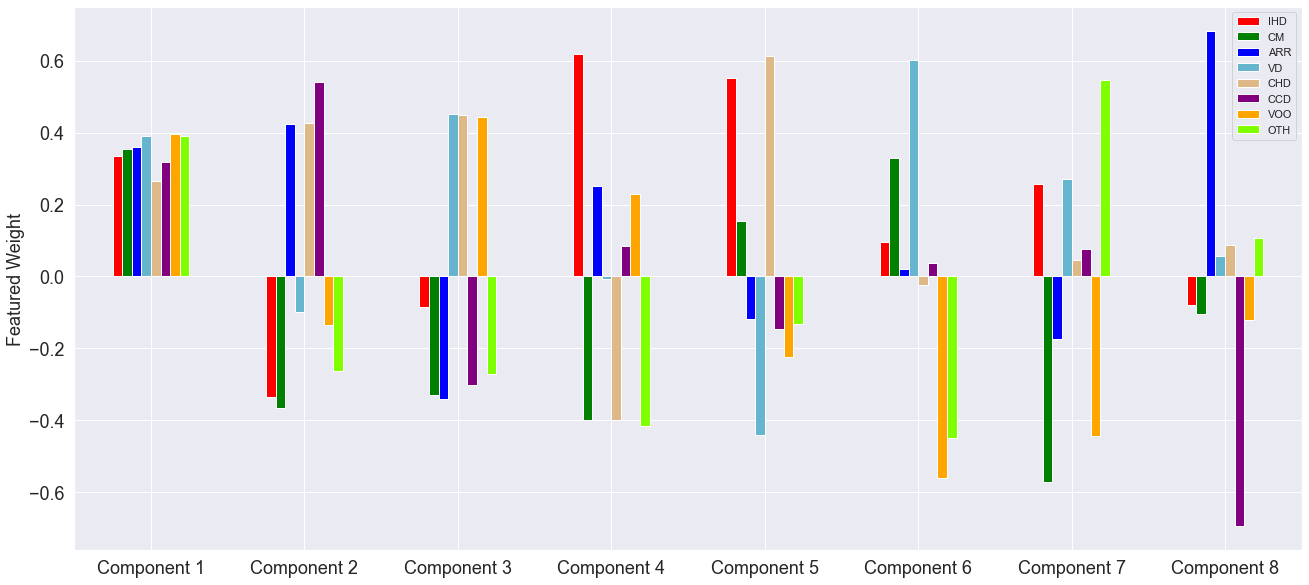

In [13]:

ax = df.plot.bar(figsize=(22,10),rot = 0, 
                 color={"IHD":"red","CM":"green","ARR":"blue","VD":"c","CHD":"burlywood","CCD":"purple","VOO":"orange","OTH":"chartreuse"})

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Featured Weight', fontsize=18)

In [14]:
ax.figure.savefig('desktop/Featured_weight_PCA_human.pdf')

In [15]:
np.corrcoef(X[:,3], X[:,6])[1,0]

0.7772733342614273